In [1]:
#This is an overview 

In [ ]:
#Hough Transformations

In [2]:
#Common libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [4]:
#uploading the image
image = mpimg.imread('houghLines.jpg')

In [5]:
#converting the photo to gray
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [7]:
edges = cv2.Canny(gray, 50, 400)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

In [10]:
#Adding more flavor 
rho, theta = lines[7][0]
x = np.cos(theta)
y = np.sin(theta)
x0 = x * rho
y0 = y * rho
x1 = int(x0 + 1000 * (-y))
y1 = int(y0 + 1000 * (y))
x2 = int(x0 - 1000 * (-y))
y2 = int(y0 - 1000 * (x))

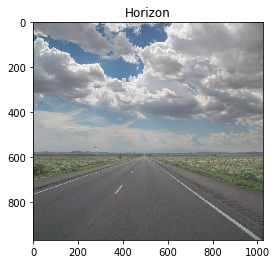

In [12]:
#Now let's plot them
cv2.line(image, (x1,y2), (x2, y2), (0,0,255), 2)
plt.figure('Hough Line Transform')
plt.imshow(image)
plt.title('Horizon')
plt.show()

In [13]:
#Applying Hough transform, to circles in an image

In [15]:
#Uploading the image 
image = mpimg.imread('houghCIrcles.jpg')

In [19]:
#Add some flavor 
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)
circles = cv2. HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 120, param1=50, param2 = 30, minRadius=50, maxRadius=90)


for i in circles[0,:]:
    #draw the outer circle
    cv2.circle(image, (i[0], i[1]), i[2], (0,255, 0), 2)
    
    #draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0,0,255), 3)

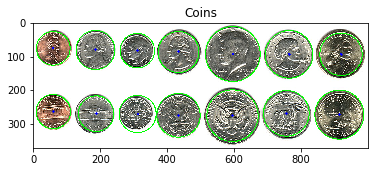

In [20]:
#plotting it
plt.figure('Hoguh Circle Transform')
plt.gray()
plt.imshow(image)
plt.title('Coins')
plt.show()

In [1]:
#stretch and shrink an image

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [4]:
#uploading image
image = mpimg.imread('lena.jpg')

In [5]:
scaleup = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
scaledown = cv2.resize(image, None, fx=0.5, fy = 0.5, interpolation=cv2.INTER_AREA) 

<IPython.core.display.Javascript object>


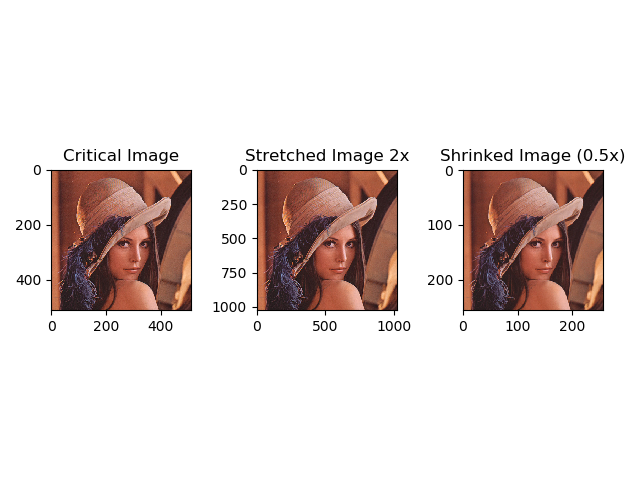

<IPython.core.display.Javascript object>


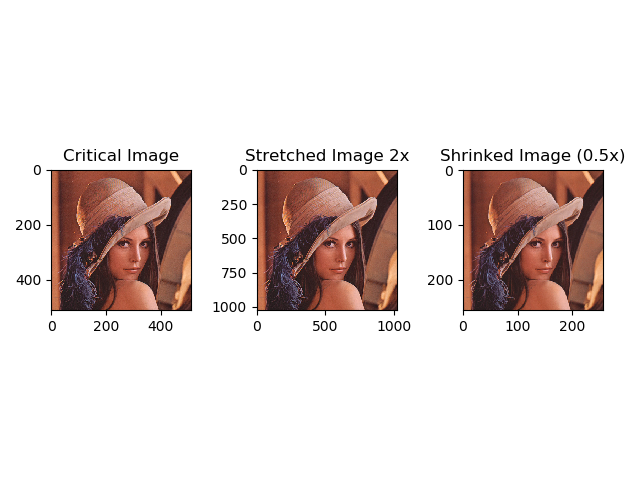

In [6]:
plt.figure('Stretch and Shrink')

In [7]:
plt.subplot(131)
plt.imshow(image)
plt.title('Critical Image')

Text(0.5, 1.0, 'Critical Image')

In [8]:
plt.subplot(132)
plt.imshow(scaleup)
plt.title('Stretched Image 2x')

Text(0.5, 1.0, 'Stretched Image 2x')

In [9]:
plt.subplot(133)
plt.imshow(scaledown)
plt.title('Shrinked Image (0.5x)')

Text(0.5, 1.0, 'Shrinked Image (0.5x)')

In [11]:
plt.tight_layout()
plt.show()

In [12]:
#Affint and Perspective Transform using OpenCV3

In [14]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [18]:
#uploading images
affImg = mpimg.imread('affine.jpg')
persImg = mpimg.imread('sudoku_small.jpg')

In [19]:
rows1, cols1,ch1 = affImg.shape

In [20]:
apts1 = np.float32([[185,814],[284,493],[882,690]])
apts2 = np.float32([[100,787],[140,455],[786,551]])

In [22]:
M1 = cv2.getAffineTransform(apts1, apts2)
affTrans = cv2.warpAffine(affImg,M1,(cols1, rows1))

In [23]:
ppts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
ppts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

In [25]:
M2 = cv2.getPerspectiveTransform(ppts1, ppts2)
persTrans = cv2.warpPerspective(persImg, M2,(300,300))

<IPython.core.display.Javascript object>


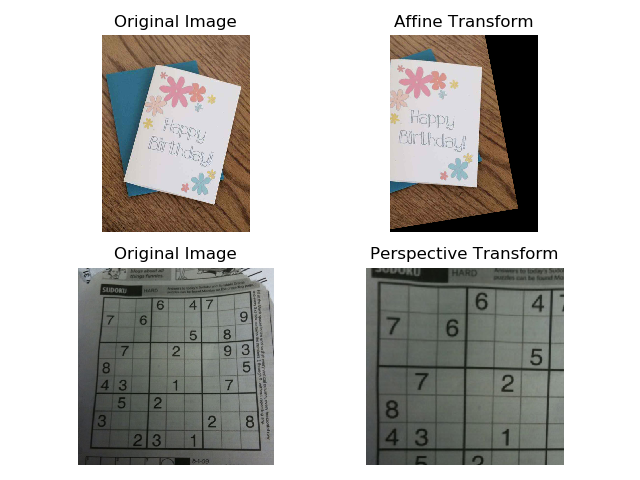

In [28]:
plt.figure('Affine and Perspective Transform')
#First Image
plt.subplot(221)
plt.imshow(affImg)
plt.title('Original Image')
plt.axis('off')
#Second Image
plt.subplot(222)
plt.imshow(affTrans)
plt.title('Affine Transform')
plt.axis('off')
#Third Image
plt.subplot(223)
plt.imshow(persImg)
plt.title('Original Image')
plt.axis('off')
#Fourth Image
plt.subplot(224)
plt.imshow(persTrans)
plt.title('Perspective Transform')
plt.axis('off')



plt.tight_layout()
plt.show()

In [29]:
#Rotation using OpenCV3

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [6]:
def rotateImage (image, angle):
    center=tuple(np.array(image.shape[0:2])/2)
    rot_mat =cv2.getRotationMatrix2D(center,angle,1.0) 
    return cv2.warpAffine(image, rot_mat, image.shape[0:2],flags=cv2.INTER_LINEAR)
    

In [7]:
img = mpimg.imread('pikachu.png')
rImg = rotateImage(img, 90)

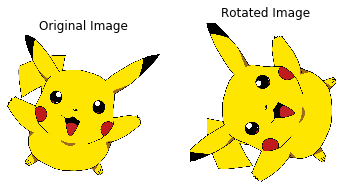

In [8]:
#Time to plot
plt.figure('Image Rotation')
plt.subplot(121),plt.imshow(img),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(rImg),plt.title('Rotated Image'),plt.axis('off')

plt.show()

In [9]:
"""
OpenCV currently has three types of image gradients/high pass filters
Sobel Derivative - cv2.Sobe()
Scharr - Derivative cv2.Scharr()
Laplacian Derivative - cv2.Laplacian()
"""

'\nOpenCV currently has three types of image gradients/high pass filters\nSobel Derivative - cv2.Sobe()\nScharr - Derivative cv2.Scharr()\nLaplacian Derivative - cv2.Laplacian()\n'

In [36]:
#Sobel Filtering 
"""
its a gradient based method and emplhasizes regions of high spatial frequency that correspond to edges
it calulates the first derivative of the image separately for the x and y axes
the sobel operator consists of a pair of two convolution kernels
"""

'\nits a gradient based method and emplhasizes regions of high spatial frequency that correspond to edges\nit calulates the first derivative of the image separately for the x and y axes\nthe sobel operator consists of a pair of two convolution kernels\n'

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [15]:
#This line supresses runttime error warninga like divide-by-zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [16]:
#Uploading image
image = mpimg.imread('checks.jpg')

In [17]:
#Apply the filter in x and y axis
Gx = cv2.Sobel(image, cv2.CV_64F,1,0,ksize=5)
Gy = cv2.Sobel(image, cv2.CV_64F,0,1,ksize=5)
Gxy = np.sqrt(Gx*Gx+Gy*Gy)

In [18]:
#Lets calculate the angle of the edged, relative to the pixel grid
try:
    theta = np.arctan(Gy/Gx)
except Exception:
    print('Hello')
    pass

<IPython.core.display.Javascript object>


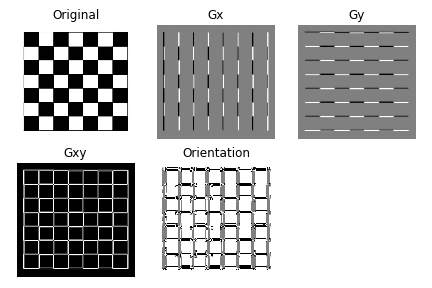

In [23]:
#Time to plot
plt.figure('Sobel Filter')
plt.subplot(231),plt.imshow(image,cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(232),plt.imshow(Gx,cmap='gray'),plt.title('Gx'), plt.axis('off')
plt.subplot(233),plt.imshow(Gy,cmap='gray'),plt.title('Gy'), plt.axis('off')
plt.subplot(234),plt.imshow(Gxy,cmap='gray'),plt.title('Gxy'), plt.axis('off')
plt.subplot(235),plt.imshow(theta,cmap='gray'),plt.title('Orientation'), plt.axis('off')


plt.tight_layout()

plt.show()

In [37]:
#Laplacian 
"""
To calculate the Laplacian derivative we use a single kernel unlike Sobel.
Also, Lapacian operator captures second order derivatives
Laplacian operator can be used for edge/blob detection
"""

'\nTo calculate the Laplacian derivative we use a single kernel unlike Sobel.\nAlso, Lapacian operator captures second order derivatives\nLaplacian operator can be used for edge/blob detection\n'

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [32]:
#Uploading image
image = mpimg.imread('checks.jpg')
limage = cv2.Laplacian(image,cv2.CV_64F)

<IPython.core.display.Javascript object>


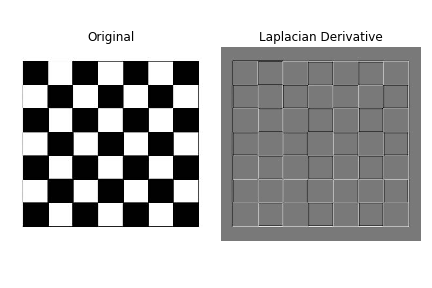

In [35]:
#Time to plot
plt.figure('Laplacian Derivative')
plt.subplot(121), plt.imshow(image,cmap='gray'), plt.title('Original'),plt.axis('off')
plt.subplot(122), plt.imshow(limage,cmap='gray'),plt.title('Laplacian Derivative'),plt.axis('off')

plt.tight_layout()

plt.show()

In [39]:
#Histogram Equalization
"""
it is a technique that can used to dynamically modify the exposure in 
images and improve contrasts
"""

'\nit is a technique that can used to dynamically modify the exposure in \nimages and improve contrasts\n'

In [40]:
#Histogram Equalization 
from PIL import Image
from numpy import *
from pylab import *

%matplotlib notebook

In [46]:
def histeq(im,nbr_bins=256):
    imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)
    subplot(222)
    title('Image histogram')
    plot(imhist)
    cdf = imhist.cumsum()
    cdf = 255*cdf /cdf[-1]
    subplot(223)
    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape),cdf

In [47]:
im = array(Image.open('shipwreck.jpg').convert('L'))

<IPython.core.display.Javascript object>


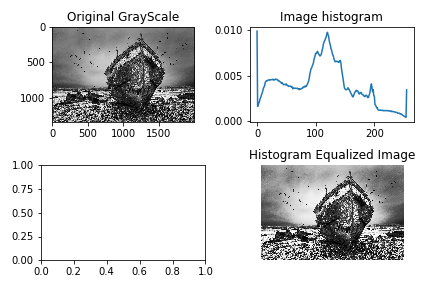

/Users/Afrochemist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


In [48]:
#Time to plot
figure('Demonstraring Histogram Equalization')

gray()

subplot(221)
title('Original GrayScale')
imshow(im)

im2,_ = histeq(im)
subplot(224)
title('Histogram Equalized Image')
imshow(im2)

axis('off')

tight_layout()
show()